In [41]:
import pickle
import tensorflow as tf

In [5]:
x= pickle.load(open('x.pkl', 'rb'))
y=pickle.load( open('y.pkl', 'rb'))

In [6]:
x

array([[[[ 56,  53,  69],
         [ 60,  54,  80],
         [ 53,  50,  81],
         ...,
         [ 62,  78,  94],
         [ 61,  85,  97],
         [ 59,  87,  94]],

        [[ 59,  63,  61],
         [ 64,  58,  82],
         [ 64,  60,  96],
         ...,
         [ 65,  87,  98],
         [ 64,  95,  98],
         [ 69, 100, 101]],

        [[ 58,  62,  60],
         [ 68,  60,  91],
         [ 58,  56,  88],
         ...,
         [ 82, 119, 110],
         [ 89, 129, 119],
         [ 80, 119, 111]],

        ...,

        [[241, 253, 255],
         [239, 254, 255],
         [246, 254, 255],
         ...,
         [ 62,  66,  60],
         [ 68,  81,  62],
         [ 78,  93,  72]],

        [[251, 251, 251],
         [235, 243, 242],
         [249, 254, 254],
         ...,
         [ 62,  76,  59],
         [ 85,  95,  82],
         [ 41,  49,  39]],

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [ 95, 104,  91],
        

In [30]:
x=x/255

In [16]:
x.shape

(8000, 100, 100, 3)

In [42]:
import tensorflow as tf

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [47]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape= x.shape[1:], activation ='relu'))

model.add(Dense(2, activation= 'softmax'))

In [49]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
history =model.fit(x,y, epochs =5, validation_split= 0.1)

Epoch 1/5
 78/225 [=========>....................] - ETA: 59s - loss: 0.6932 - accuracy: 0.5032 

KeyboardInterrupt: 

In [53]:
history =model.fit(x,y, epochs =5, validation_split= 0.1)

Epoch 1/5
225/225 [==============================] - 98s 433ms/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 2/5
225/225 [==============================] - 100s 443ms/step - loss: 0.6933 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 3/5
225/225 [==============================] - 99s 440ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 4/5
225/225 [==============================] - 91s 404ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 5/5
225/225 [==============================] - 94s 420ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5050


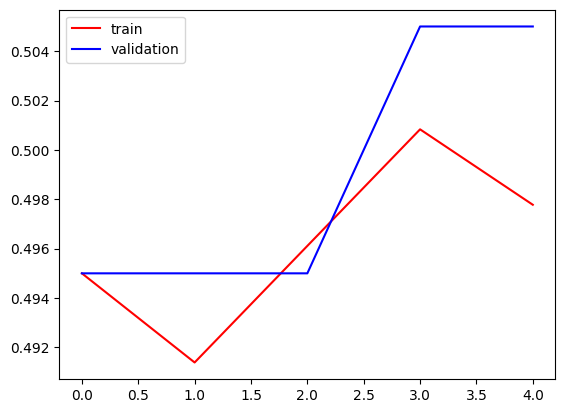

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

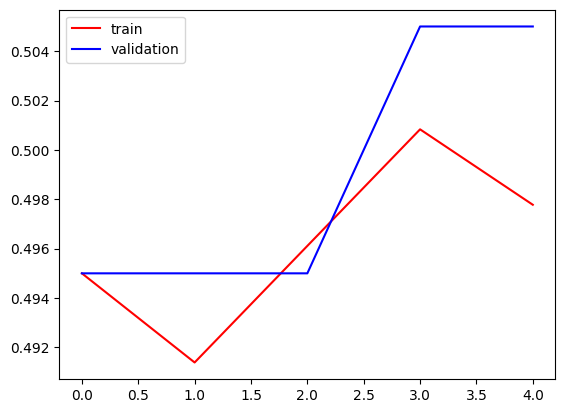

In [57]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [92]:
import cv2
test_img = cv2.imread(r'C:\Users\HP\Desktop\q\cat.jpg')

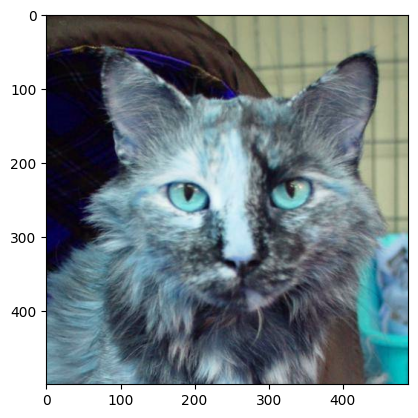

In [93]:
plt.imshow(test_img)

In [94]:
test_img.shape

(499, 489, 3)

In [95]:
test_img = cv2.resize(test_img,(100,100))

In [96]:
test_input = test_img.reshape((1,100,100,3))

In [98]:
model.predict(test_input)

1/1 [==============================] - 0s 58ms/step


array([[0., 1.]], dtype=float32)

In [88]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

In [91]:
input_image_path = input(r'C:\Users\HP\Desktop\q\dog.jpg')

input_image = cv2.imread(input_image_path)

img = np.asarray(Image.open(input_image_path))

input_image_resize = cv2.resize(input_image, (100,100))

plt.imshow(input_image_resize)

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,100,100,3])

print(image_reshaped.shape)

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

AttributeError: 'str' object has no attribute 'read'

1/1 [==============================] - 0s 38ms/step
The image represents a Dog


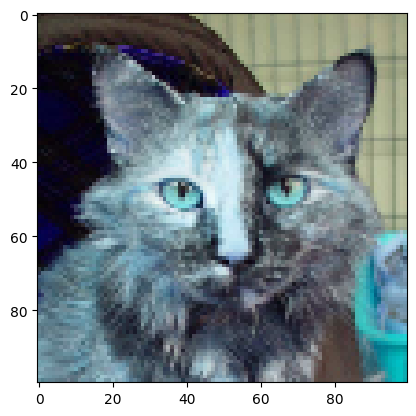

In [100]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

input_image_path = r'C:\Users\HP\Desktop\q\cat.jpg'

# Load the image using OpenCV
input_image = cv2.imread(input_image_path)

# Convert the image to a PIL Image object
pil_image = Image.fromarray(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

# Convert the PIL Image object to a NumPy array
img = np.array(pil_image)

# Resize the image
input_image_resize = cv2.resize(input_image, (100,100))

# Display the resized image using Matplotlib
plt.imshow(input_image_resize)

# Scale the pixel values to the range [0, 1]
input_image_scaled = input_image_resize/255

# Reshape the input array for the model
image_reshaped = np.expand_dims(input_image_scaled, axis=0)

# Predict the class probabilities using the model
input_prediction = model.predict(image_reshaped)

# Get the predicted class label
input_pred_label = np.argmax(input_prediction)

# Print the predicted label
if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')


In [90]:
plt.imshow(model.predict(test_input))